In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew #for some statistics

# Suppress 'deprecated' warnings
import warnings
def fxn():
    warnings.warn("deprecated", DeprecationWarning)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

%matplotlib inline
pd.set_option('max_colwidth',1000)
color = sns.color_palette()
sns.set_style('darkgrid')

In [2]:
# Load the loan data
df = pd.read_pickle('data_cleaned.pkl')
df.reset_index(drop=True, inplace=True)

In [3]:
# Encode the loan_status to numerical values
# Fully Paid = 1
# Charged Off = 0
df['loan_status'] = df['loan_status'].apply(lambda x: int(x == 'Fully Paid'))

In [4]:
# Remove int_rate also
df.drop('int_rate', axis=1, inplace=True)

In [5]:
df.describe()

loan_amnt    funded_amnt  funded_amnt_inv           term  \
count  810576.000000  810576.000000    810576.000000  810576.000000   
mean    14301.585200   14288.145066     14255.991260      41.784302   
std      8491.750372    8484.975771      8490.013028      10.264756   
min       500.000000     500.000000         0.000000      36.000000   
25%      8000.000000    8000.000000      7975.000000      36.000000   
50%     12000.000000   12000.000000     12000.000000      36.000000   
75%     20000.000000   20000.000000     20000.000000      36.000000   
max     40000.000000   40000.000000     40000.000000      60.000000   

         installment    annual_inc    loan_status       zip_code  \
count  810576.000000  8.105760e+05  810576.000000  810576.000000   
mean      436.135422  7.539955e+04       0.794857     518.683627   
std       255.266548  6.597295e+04       0.403806     314.301786   
min         4.930000  3.000000e+03       0.000000       7.000000   
25%       251.360000  4.550000e+04       1.000000     233.000000   
50%       376.570000  6.500000e+04       1.000000     481.000000   
75%       575.010000  9.000000e+04       1.000000     822.000000   
max      1714.540000  9.550000e+06       1.000000     999.000000   

                 dti    delinq_2yrs           ...             tot_hi_cred_lim  \
count  810576.000000  810576.000000           ...                8.105760e+05   
mean       17.828183       0.306745           ...                1.584802e+05   
std         8.270297       0.856178           ...                1.738546e+05   
min        -1.000000       0.000000           ...                0.000000e+00   
25%        11.640000       0.000000           ...                3.939200e+04   
50%        17.350000       0.000000           ...                9.458100e+04   
75%        23.610000       0.000000           ...                2.356090e+05   
max        49.950000      39.000000           ...                9.999999e+06   

       total_bal_ex_mort  total_bc_limit  total_il_high_credit_limit  \
count       8.105760e+05    8.105760e+05                8.105760e+05   
mean        4.594352e+04    1.970272e+04                3.762144e+04   
std         4.634582e+04    2.077370e+04                4.189798e+04   
min         0.000000e+00    0.000000e+00                0.000000e+00   
25%         1.801775e+04    6.500000e+03                9.000000e+03   
50%         3.470600e+04    1.350000e+04                2.780900e+04   
75%         5.921800e+04    2.600000e+04                5.215300e+04   
max         2.688920e+06    1.105500e+06                2.101913e+06   

       issue_d_month   issue_d_year  earliest_cr_line_month  \
count  810576.000000  810576.000000           810576.000000   
mean        6.505792    2014.275289                6.752739   
std         3.428047       1.520495                3.410513   
min         1.000000    2007.000000                1.000000   
25%         4.000000    2013.000000                4.000000   
50%         7.000000    2014.000000                7.000000   
75%        10.000000    2015.000000               10.000000   
max        12.000000    2017.000000               12.000000   

       earliest_cr_line_year  last_credit_pull_d_month  \
count          810576.000000             810576.000000   
mean             1998.184706                  5.304564   
std                 7.415755                  4.207243   
min              1944.000000                  1.000000   
25%              1994.000000                  1.000000   
50%              2000.000000                  4.000000   
75%              2003.000000                 10.000000   
max              2068.000000                 12.000000   

       last_credit_pull_d_year  
count            810576.000000  
mean               2016.970030  
std                   1.108592  
min                2007.000000  
25%                2017.000000  
50%                2017.000000  
75%                2018.000000  
max                2018.

In [6]:
from sklearn.utils import shuffle
df = shuffle(df)

In [7]:
# Correlation Analysis
# most correlated features
corrmat = df.corr()

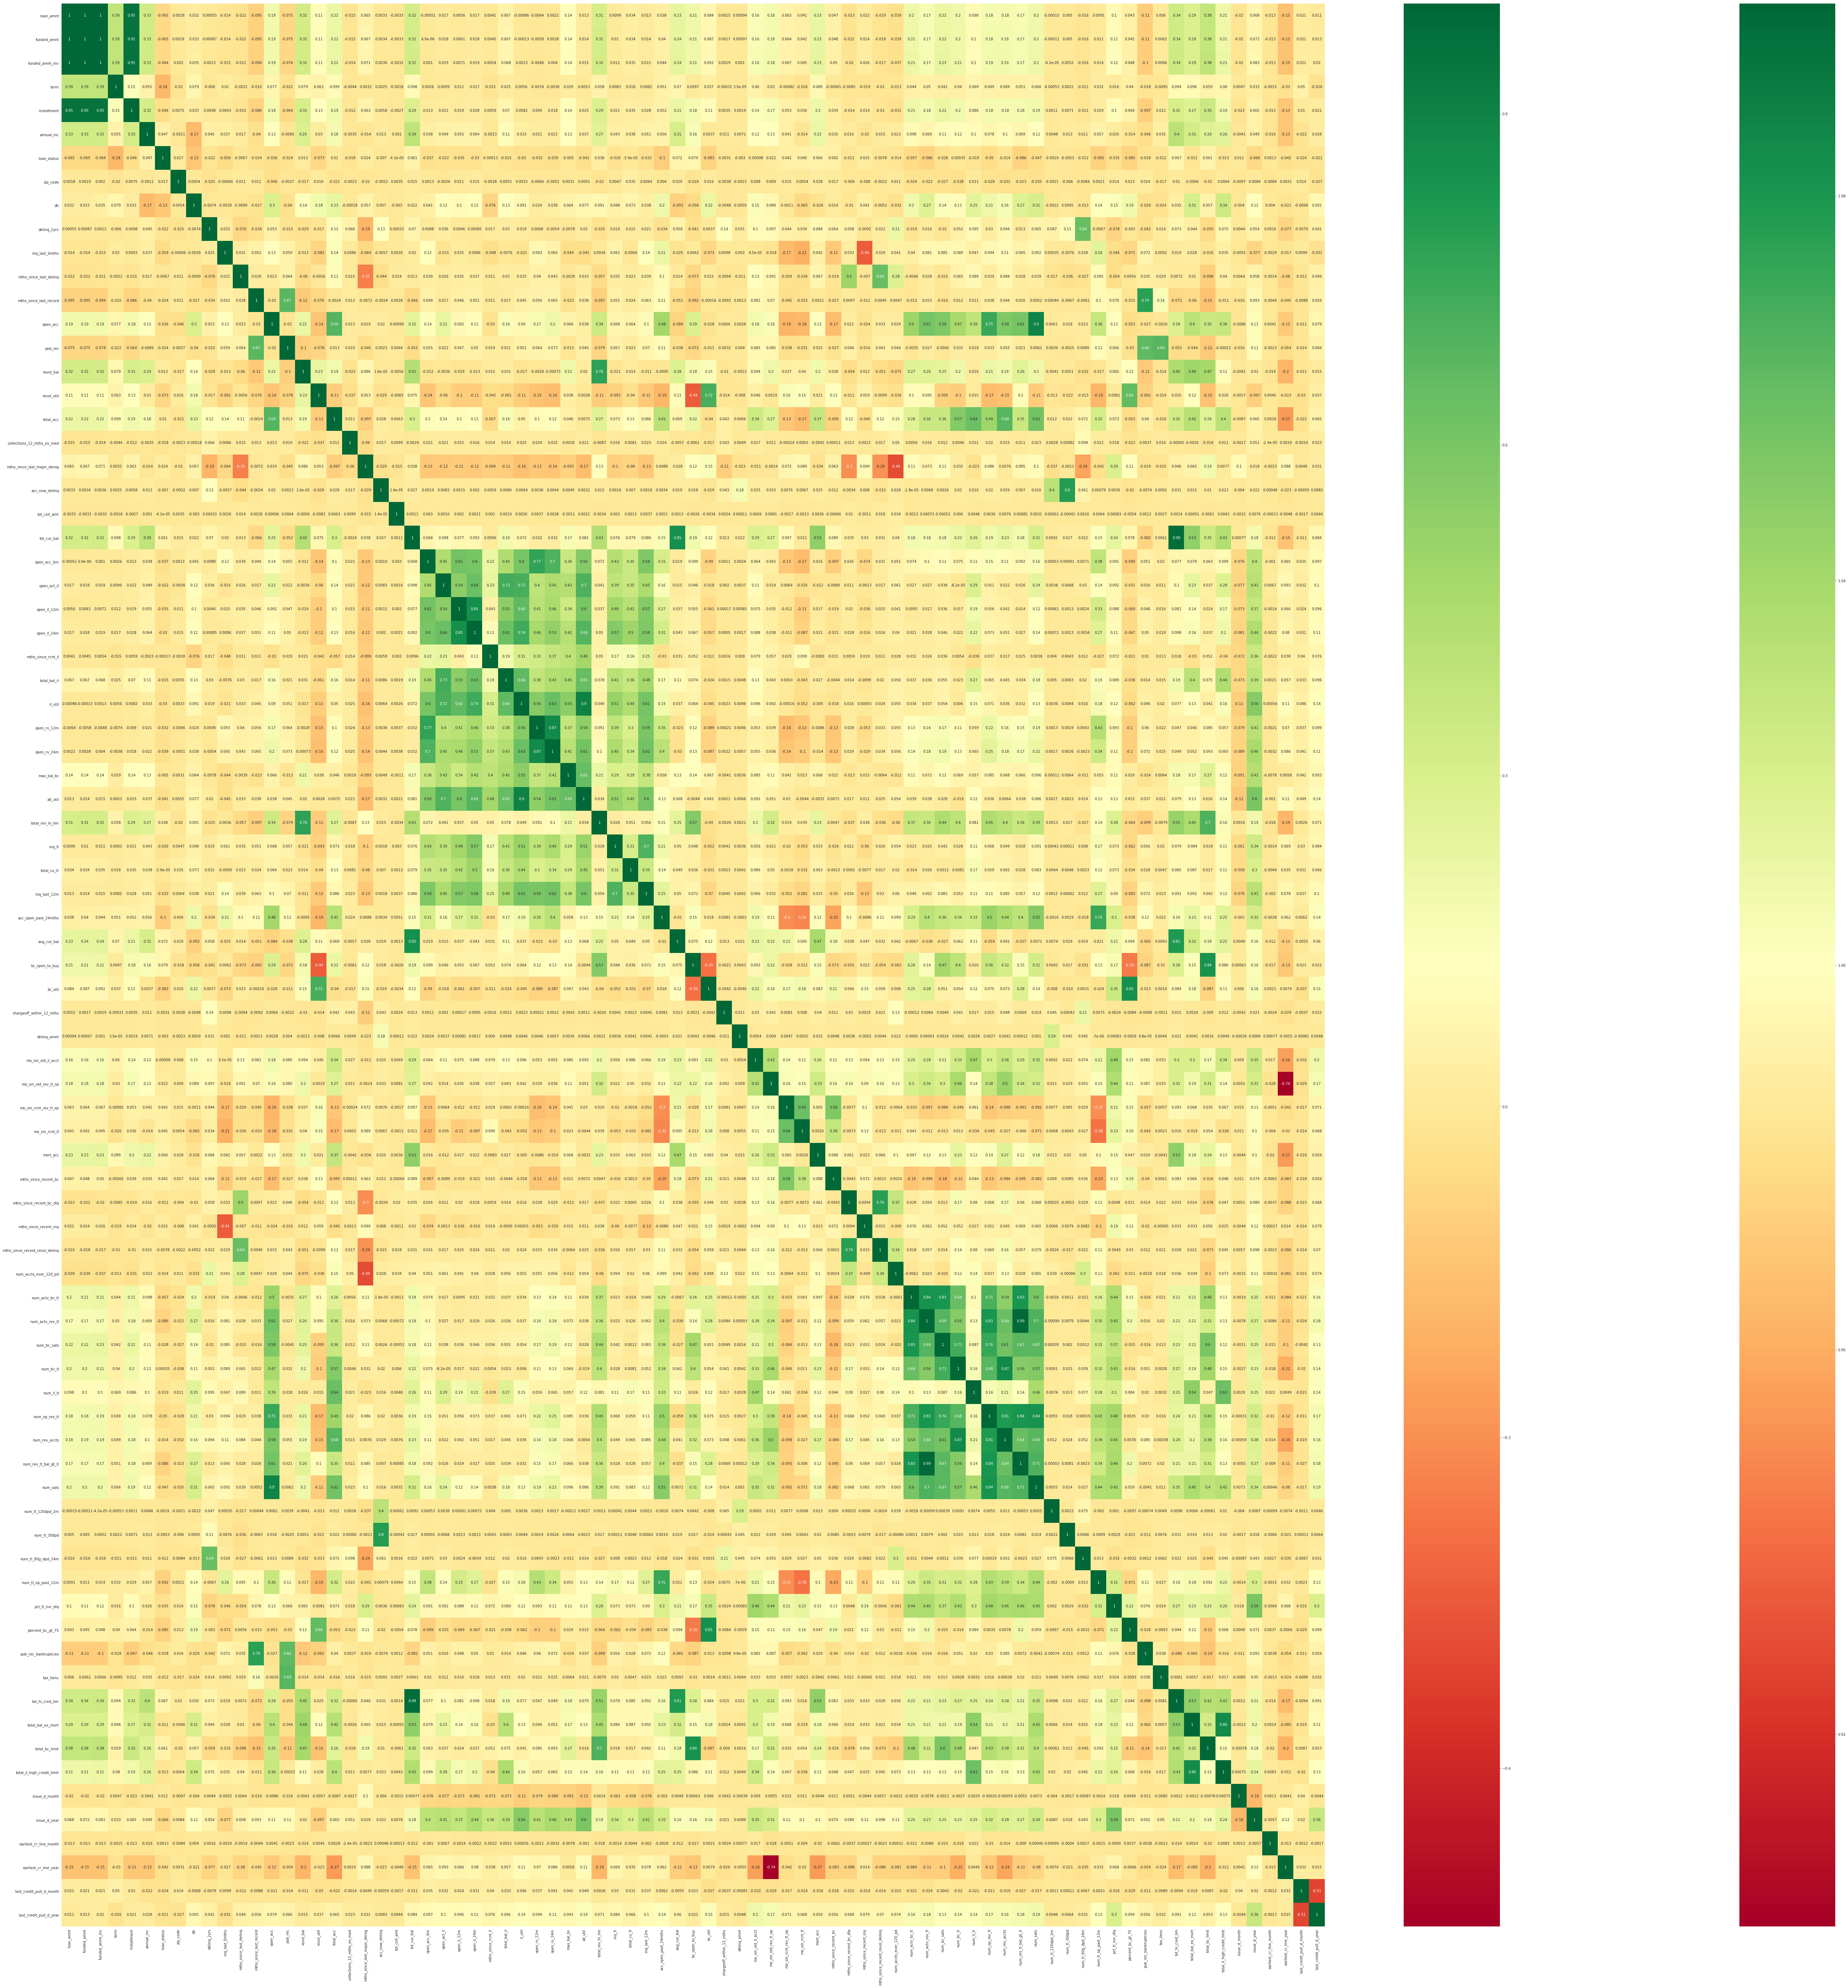

In [8]:
top_corr_features = corrmat.index[abs(corrmat["loan_status"])>0.8]
plt.figure(figsize=(100,100))
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest")
    ax1.grid(True)
    plt.title('Feature Correlation')
    fig.colorbar(cax)
    plt.figure(figsize=(100,100))
    plt.show()

# correlation_matrix(df)

In [9]:
print(type(corrmat['loan_status']))
print((corrmat['loan_status'][corrmat['loan_status'] > 0.01]).sort_values())

<class 'pandas.core.series.Series'>
total_acc                      0.010086
issue_d_month                  0.011864
revol_bal                      0.013240
zip_code                       0.016743
mo_sin_old_rev_tl_op           0.021727
mths_since_last_major_derog    0.024134
mths_since_recent_inq          0.024633
total_rev_hi_lim               0.037841
mths_since_recent_bc           0.041576
mo_sin_rcnt_rev_tl_op          0.041986
mo_sin_rcnt_tl                 0.045205
annual_inc                     0.046626
total_bc_limit                 0.060672
tot_cur_bal                    0.061455
mort_acc                       0.065924
tot_hi_cred_lim                0.067197
avg_cur_bal                    0.071526
bc_open_to_buy                 0.079392
loan_status                    1.000000
Name: loan_status, dtype: float64


/home/anilraj/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


mu = 0.79 and sigma = 0.40


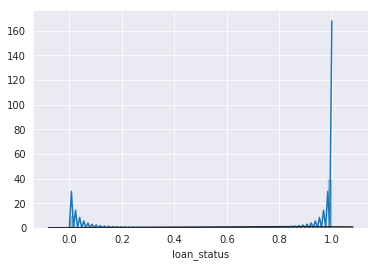

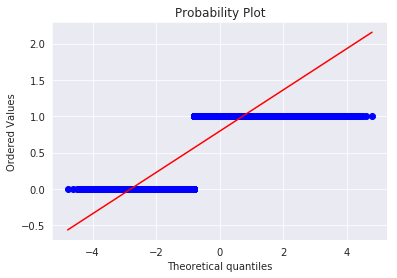

In [10]:
# Target Variable 
def check_skewness(col):
    sns.distplot(df[col], fit=norm)
    fig = plt.figure()
    res = stats.probplot(df[col], plot=plt)
    (mu, sigma) = norm.fit(df[col])
    print('mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))

check_skewness('loan_status')

In [11]:
# Separate out the feature and label
loan_status = df['loan_status']
df = df.drop('loan_status', axis=1)

In [12]:
# Highly skewed features

# Remove categorical features and look at skewness
# Create a copy of df.
# Remove object-type features from df_copy
# Look at skewness of df_copy

df_copy = df.copy()

cat_features = df_copy.select_dtypes(include=['object']).columns
for y in cat_features:
    df_copy.drop(y, axis=1, inplace=True)
    
df_copy.rename(columns = {'emp_length_<1':'emp_length_less_than_1'}, inplace = True)

skewed_features = df_copy.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew': skewed_features})
skewness

Skew
tot_coll_amt                 858.560473
delinq_amnt                   75.149751
total_rev_hi_lim              58.023173
num_tl_120dpd_2m              48.971680
annual_inc                    44.863324
tax_liens                     42.379586
num_tl_30dpd                  22.026855
max_bal_bc                    18.776279
acc_now_delinq                18.523642
chargeoff_within_12_mths      17.290900
collections_12_mths_ex_med    14.861963
revol_bal                     14.473305
num_tl_90g_dpd_24m            13.964158
pub_rec                       13.827479
total_cu_tl                    6.985653
mths_since_rcnt_il             6.840785
total_bal_il                   6.406940
inq_fi                         5.803552
delinq_2yrs                    5.696694
open_act_il                    5.392522
num_accts_ever_120_pd          5.050799
inq_last_12m                   4.624548
open_il_12m                    4.581332
open_rv_12m                    4.412812
total_bal_ex_mort              4.210221
mo_sin_rcnt_tl                 4.184848
open_acc_6m                    4.152982
open_il_24m                    4.090081
avg_cur_bal                    4.081586
bc_open_to_buy                 4.060294
...                                 ...
mths_since_last_delinq         1.215733
term                           1.211076
num_actv_rev_tl                1.141535
mths_since_recent_inq          1.105570
num_actv_bc_tl                 1.102083
num_rev_tl_bal_gt_0            1.061028
num_op_rev_tl                  1.033430
num_bc_tl                      1.030009
installment                    0.993410
num_rev_accts                  0.927628
total_acc                      0.915349
num_sats                       0.768121
funded_amnt                    0.767444
funded_amnt_inv                0.766866
loan_amnt                      0.765212
mo_sin_old_rev_tl_op           0.712372
last_credit_pull_d_month       0.284349
dti                            0.244330
percent_bc_gt_75               0.225528
zip_code                       0.025426
issue_d_month                 -0.028589
mo_sin_old_il_acct            -0.051696
revol_util                    -0.067375
earliest_cr_line_month        -0.128582
bc_util                       -0.413254
mths_since_last_major_derog   -0.659142
issue_d_year                  -0.758774
earliest_cr_line_year         -0.954509
last_credit_pull_d_year       -1.828918
pct_tl_nvr_dlq                -2.646630

[80 rows x 1 columns]

In [13]:
skewness = skewness[abs(skewness) > 0.75]
print('There are {} skewed features to Box Cox transform'.format(skewness.shape[0]))

There are 80 skewed features to Box Cox transform


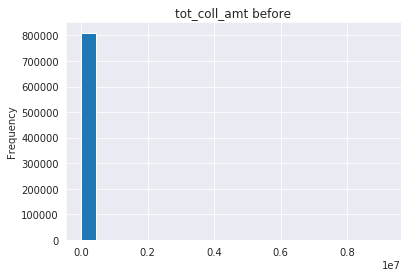

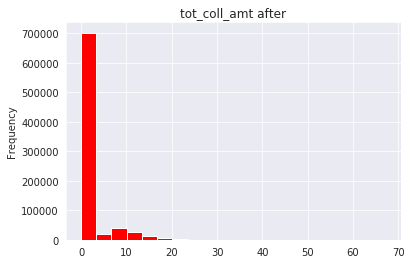

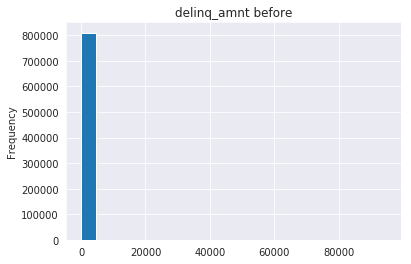

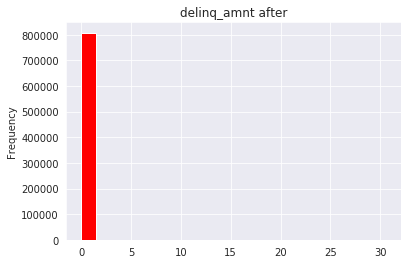

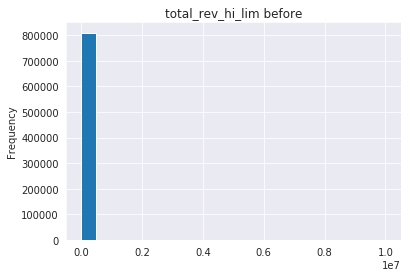

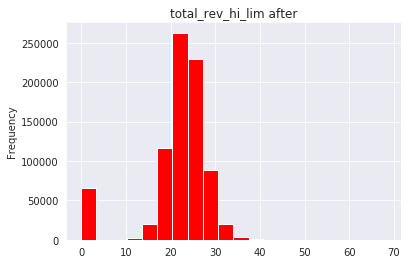

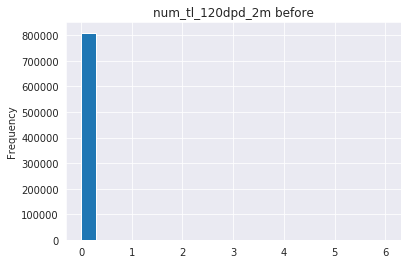

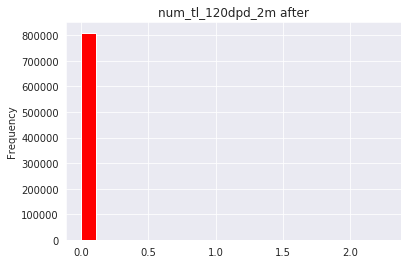

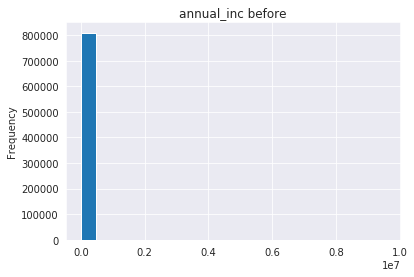

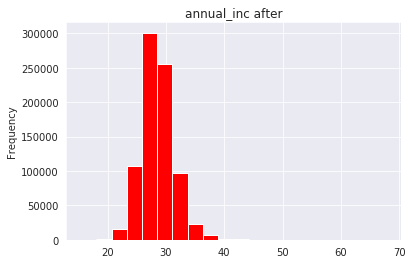

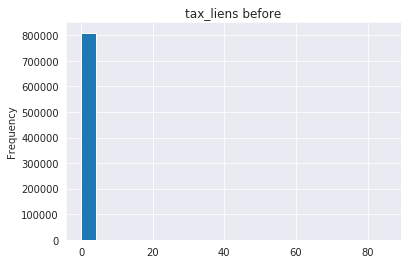

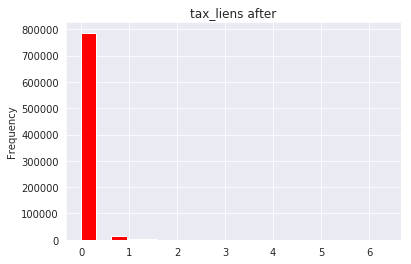

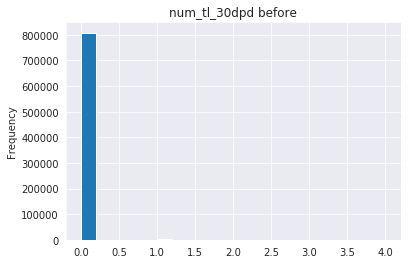

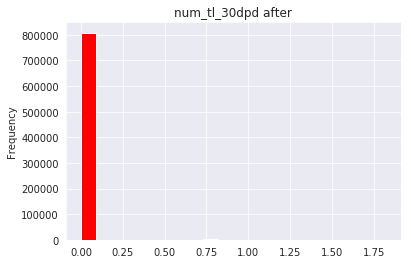

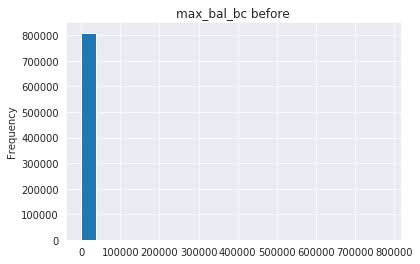

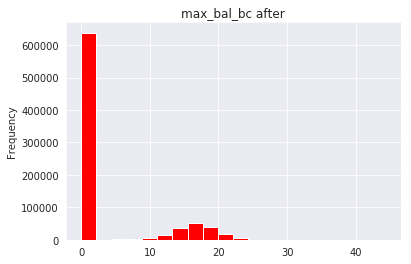

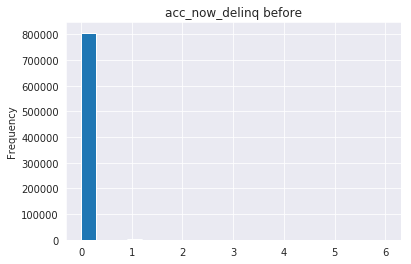

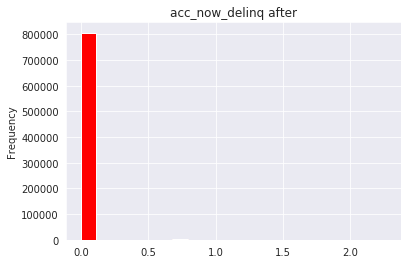

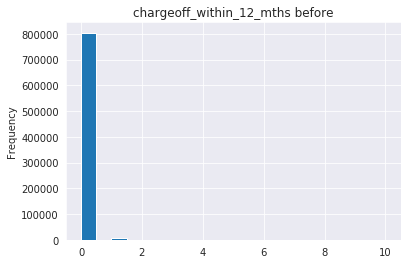

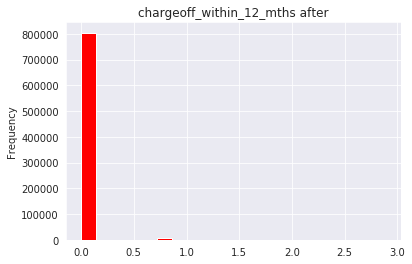

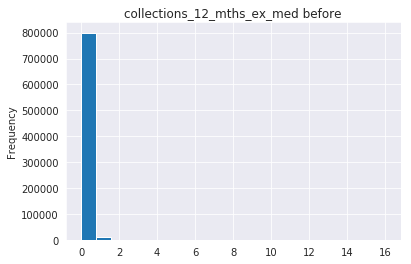

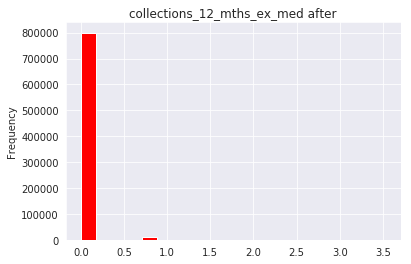

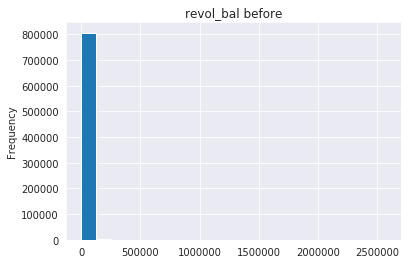

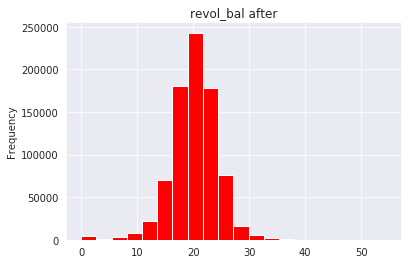

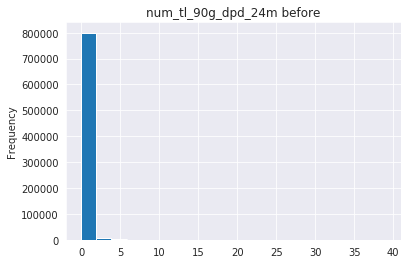

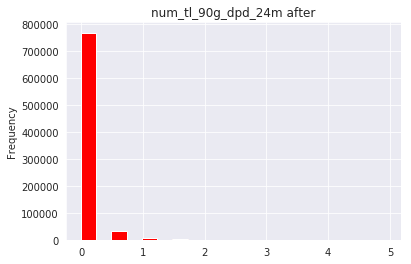

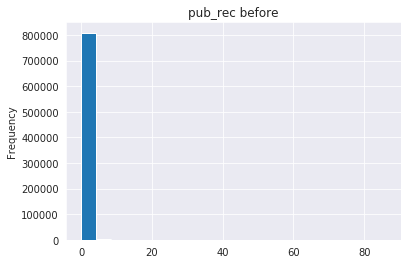

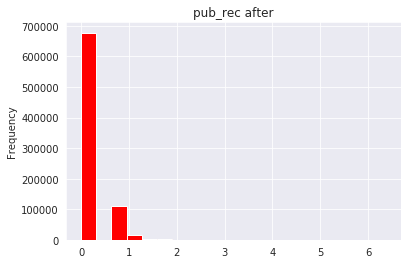

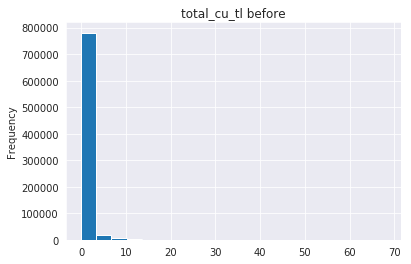

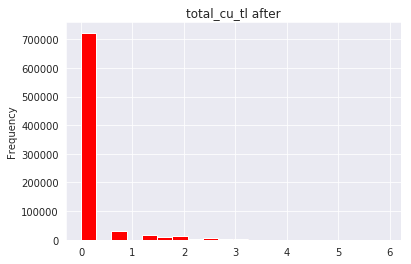

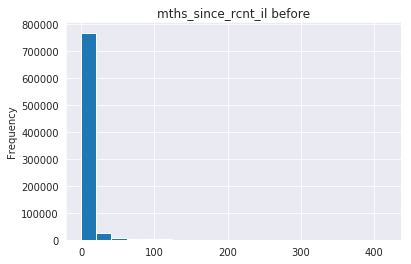

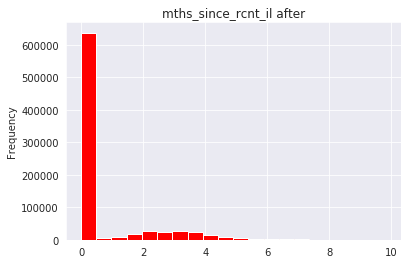

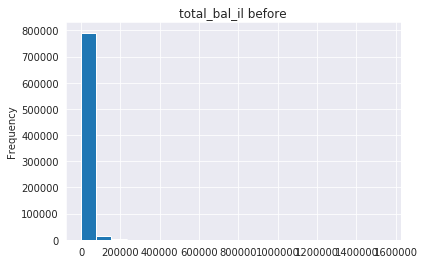

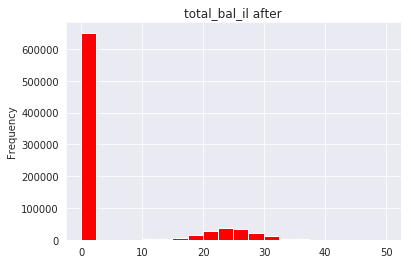

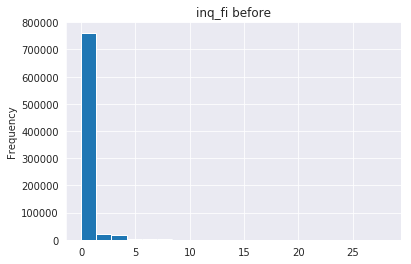

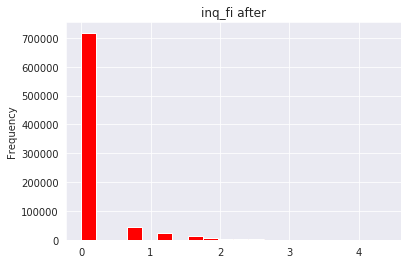

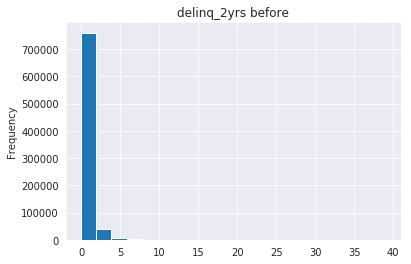

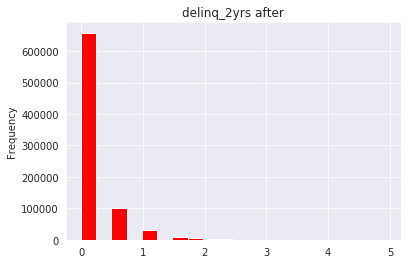

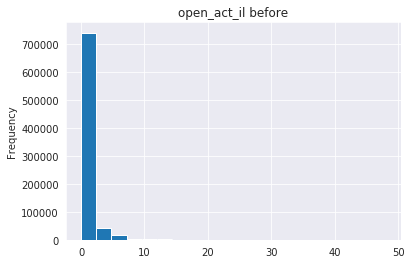

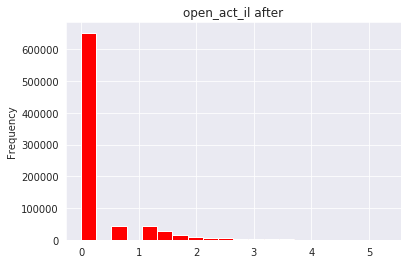

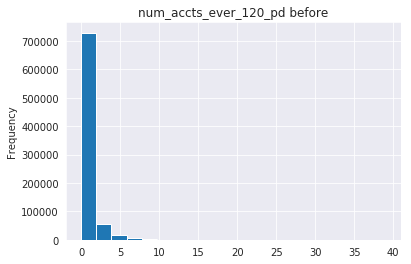

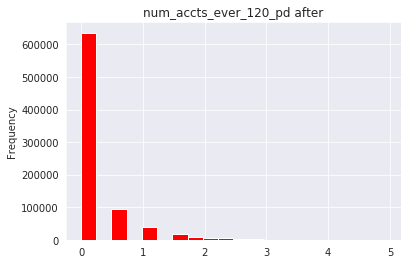

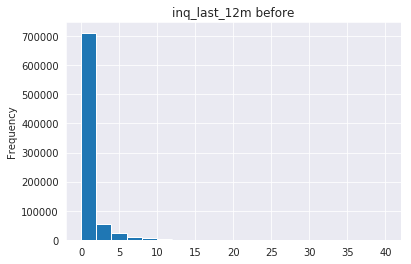

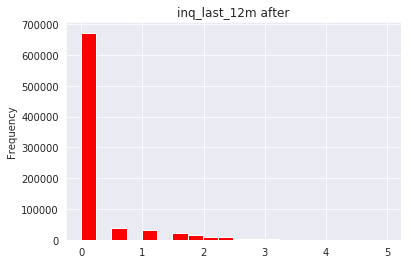

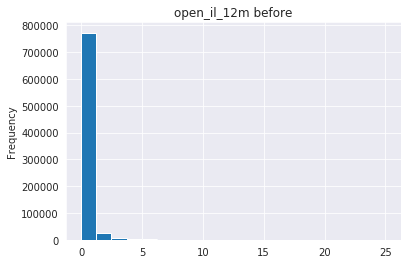

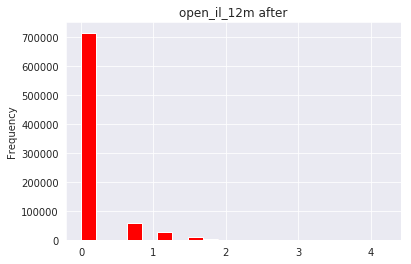

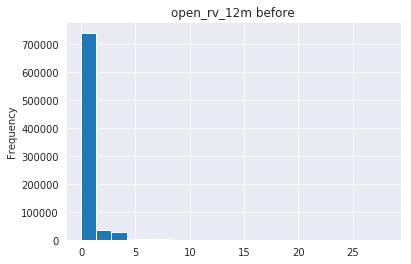

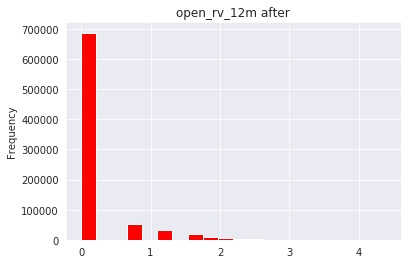

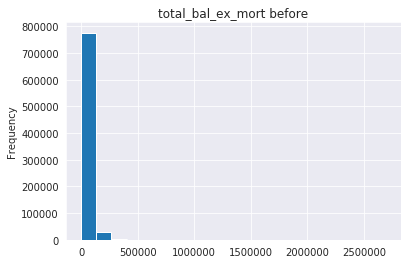

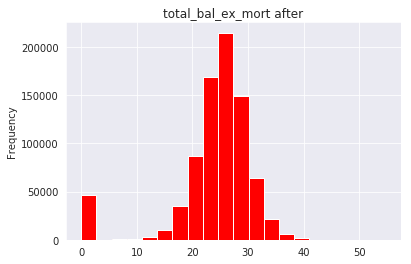

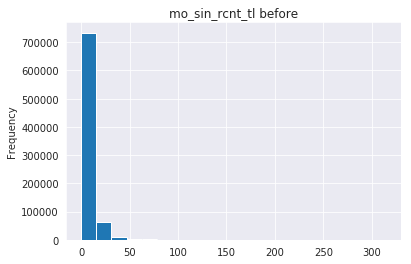

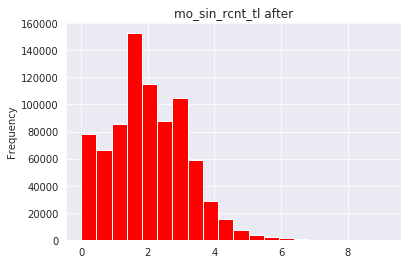

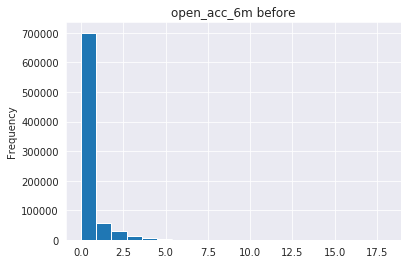

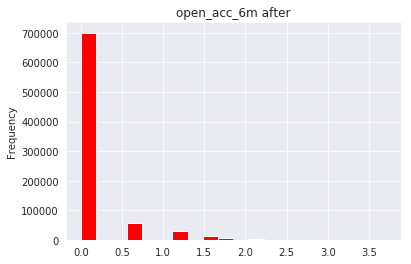

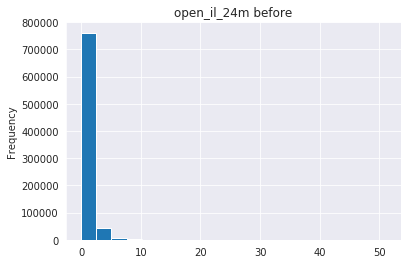

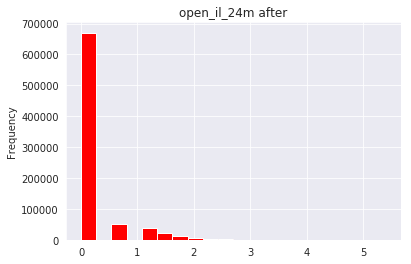

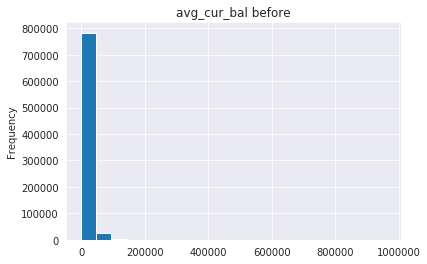

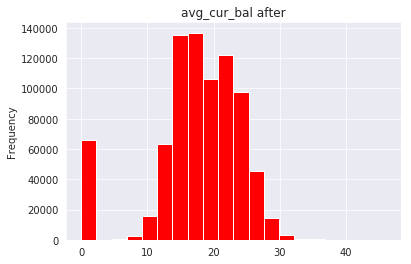

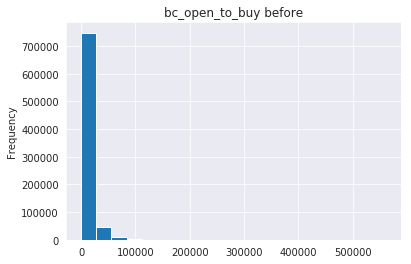

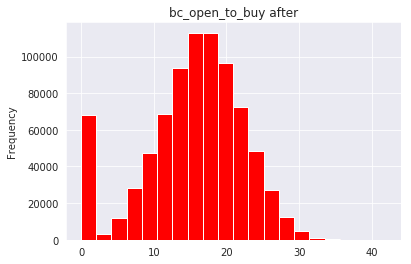

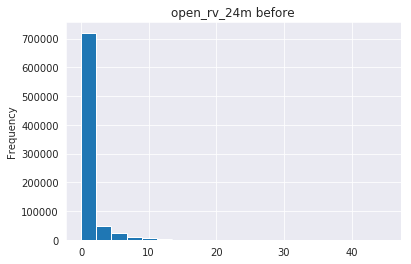

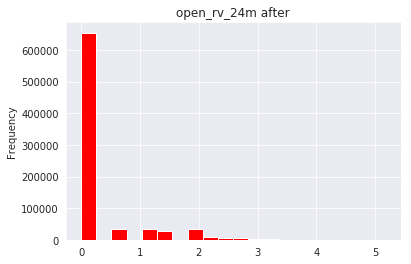

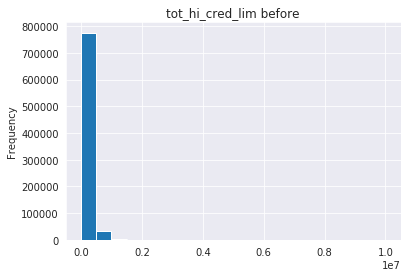

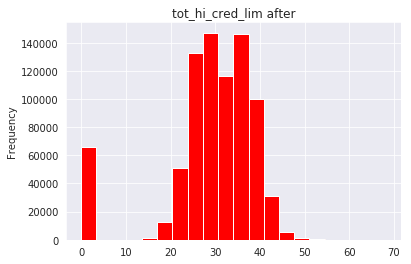

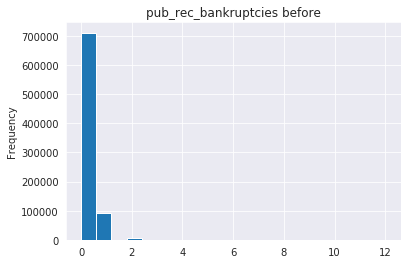

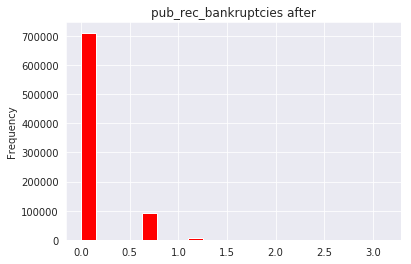

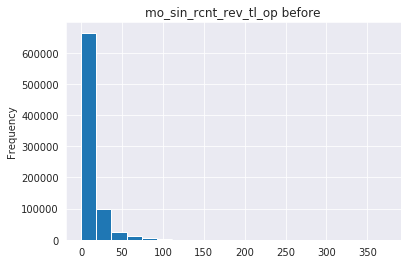

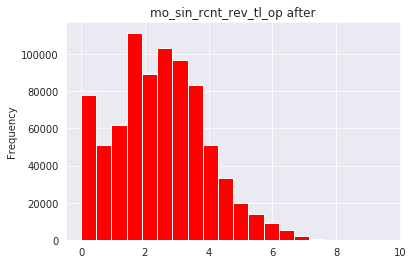

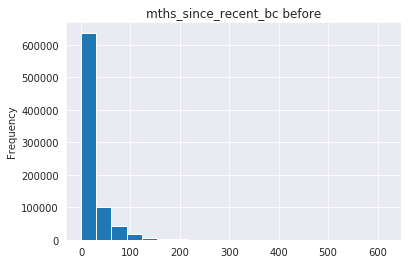

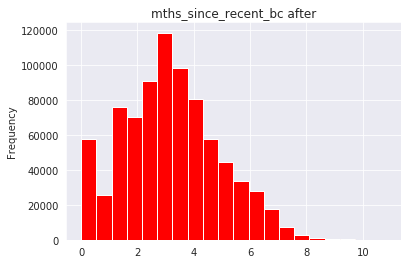

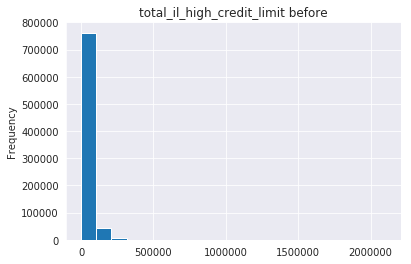

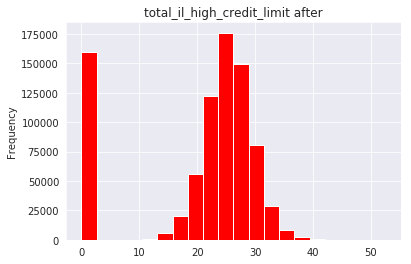

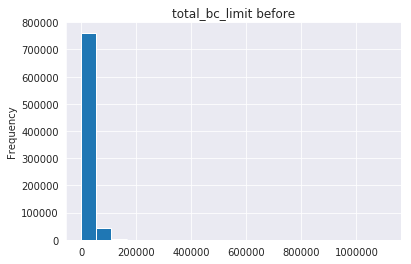

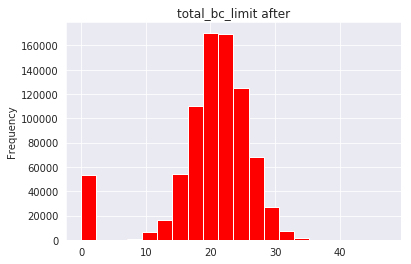

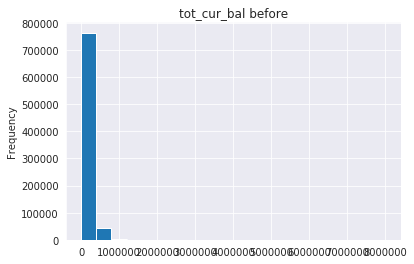

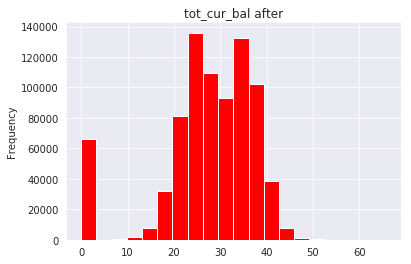

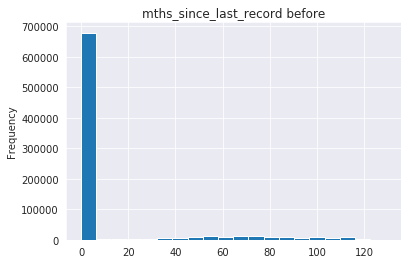

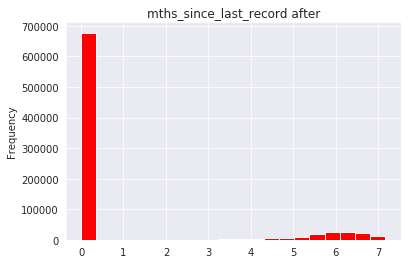

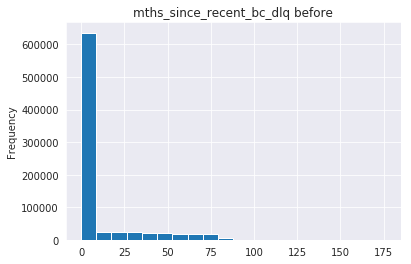

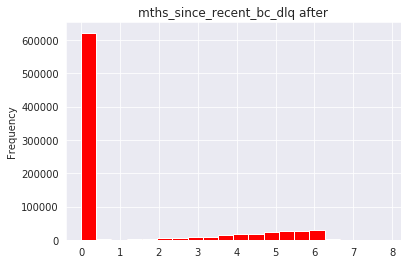

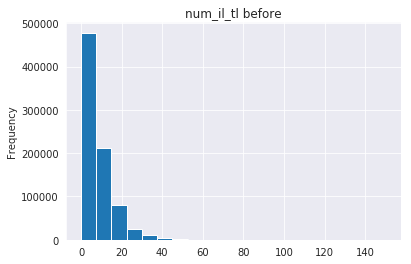

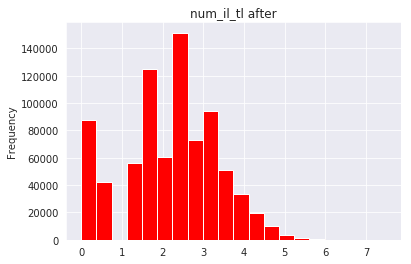

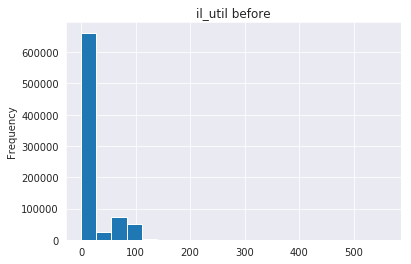

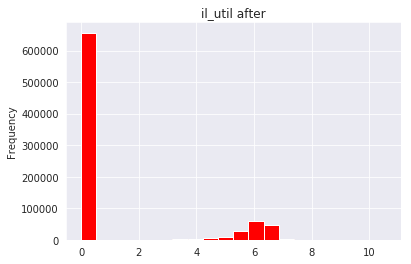

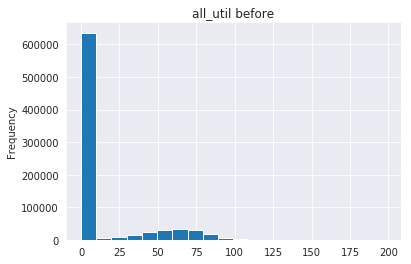

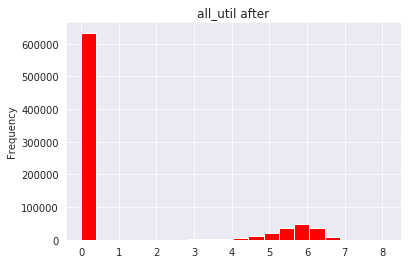

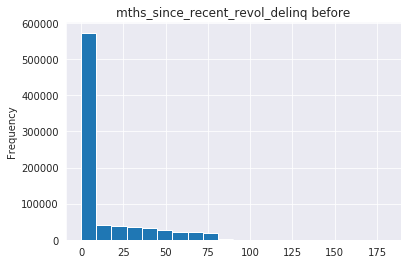

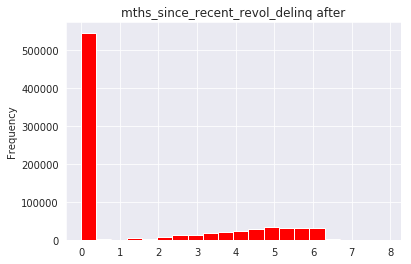

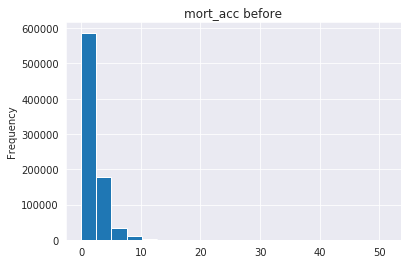

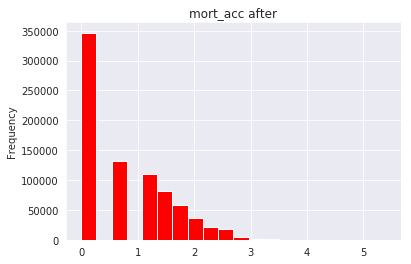

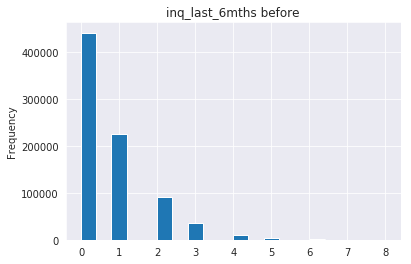

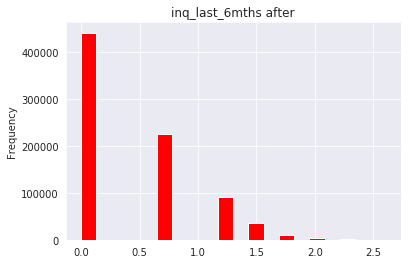

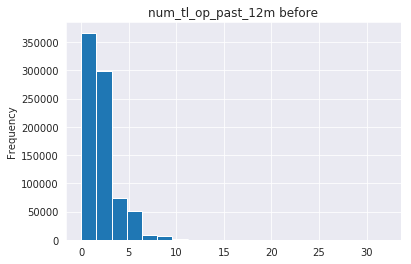

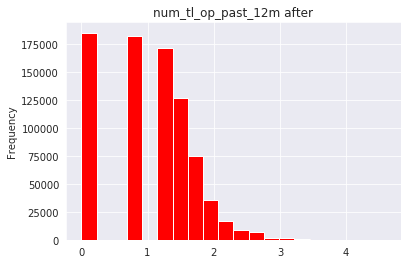

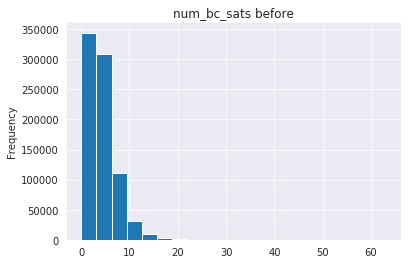

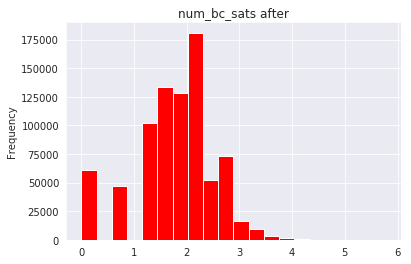

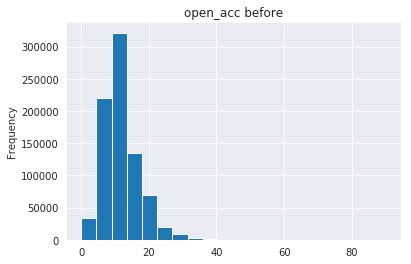

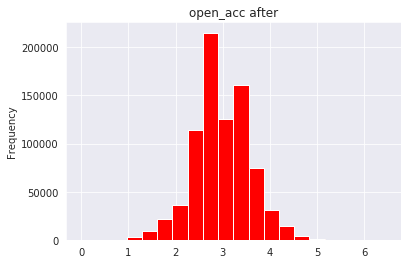

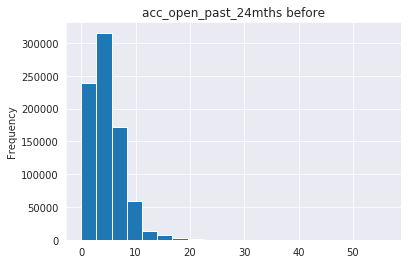

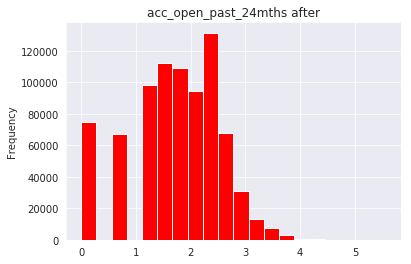

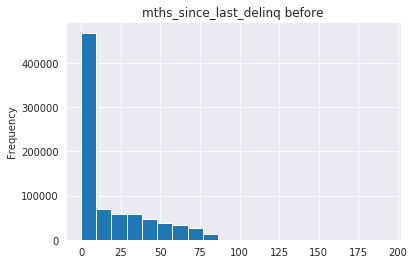

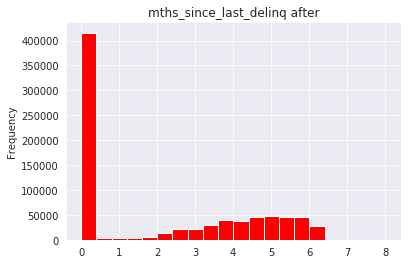

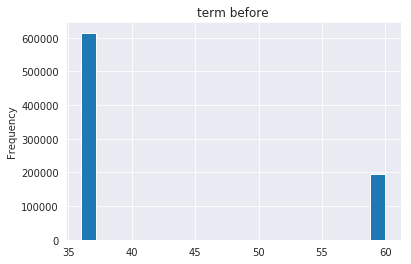

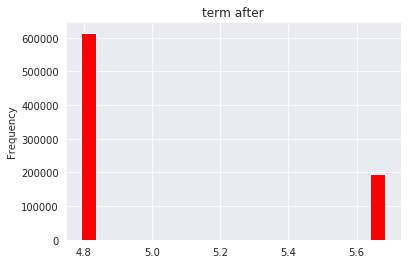

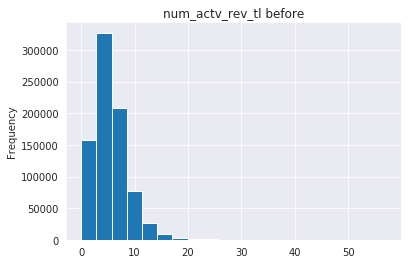

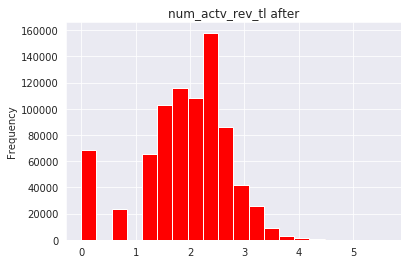

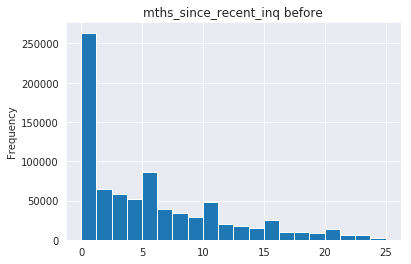

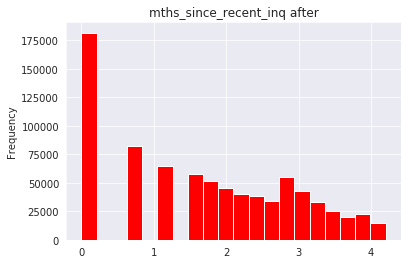

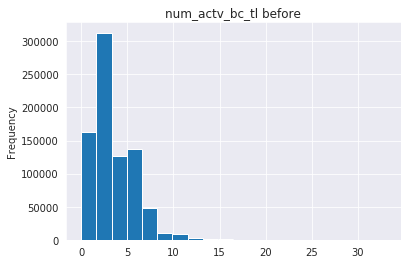

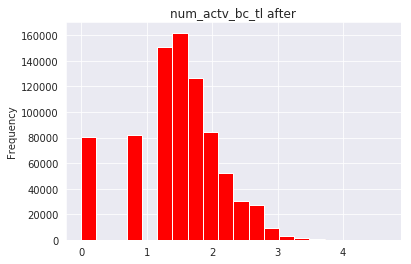

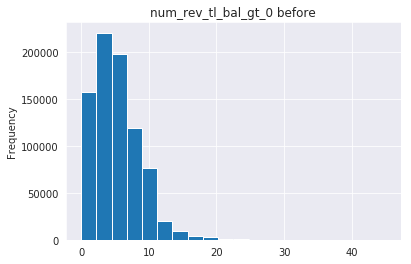

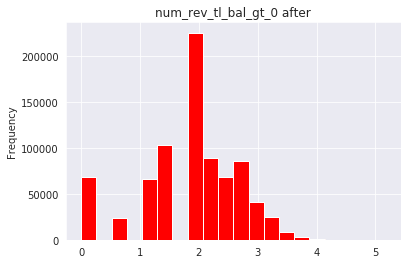

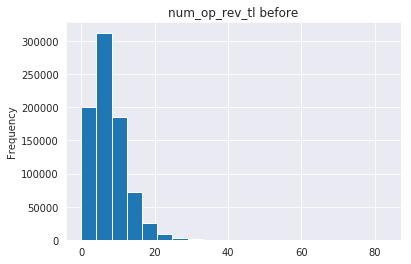

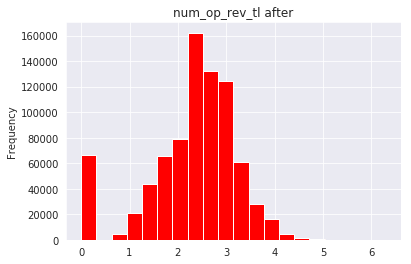

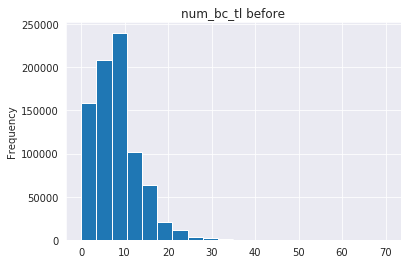

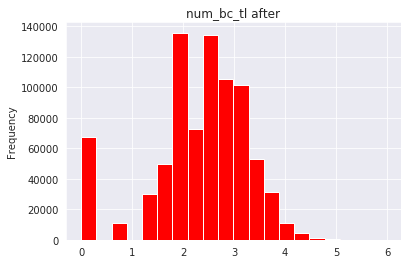

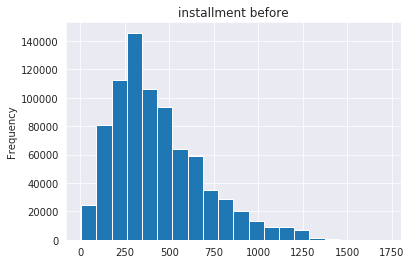

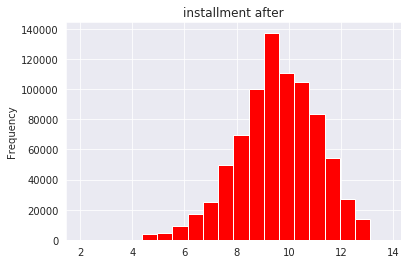

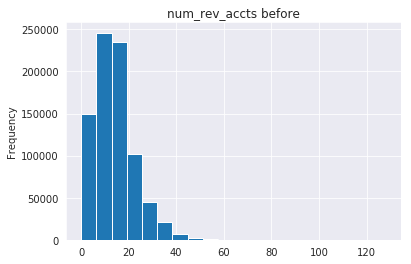

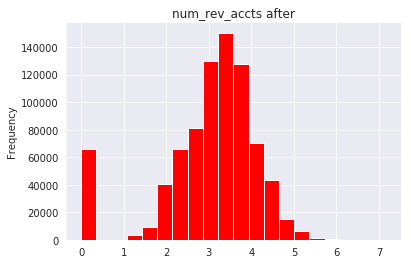

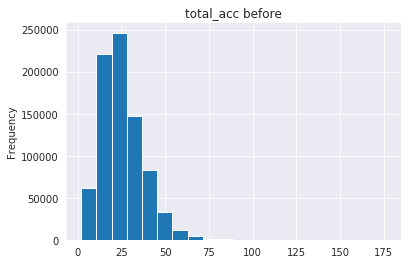

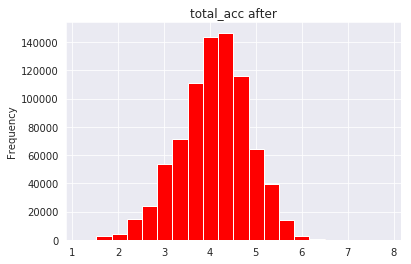

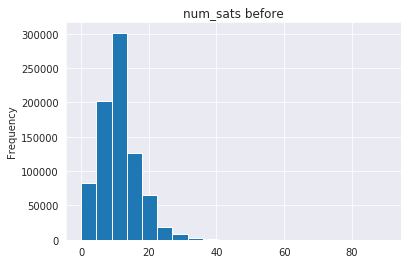

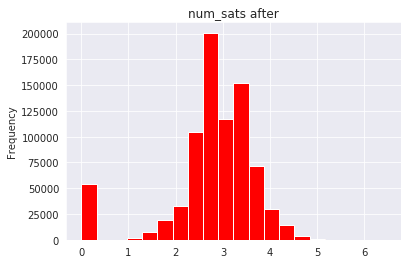

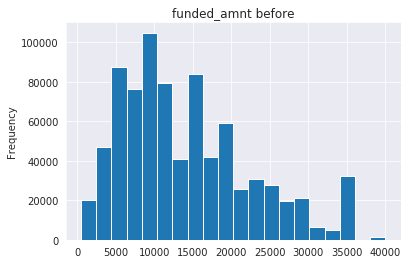

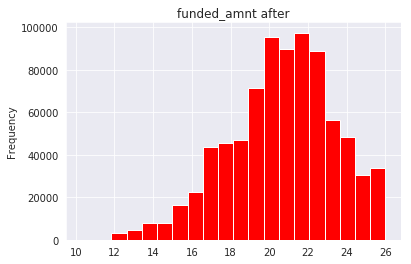

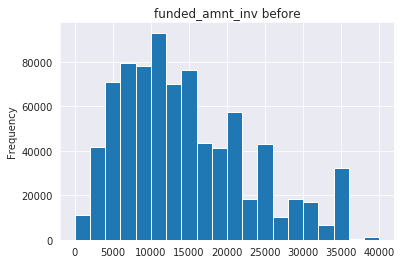

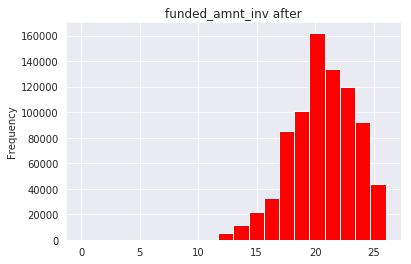

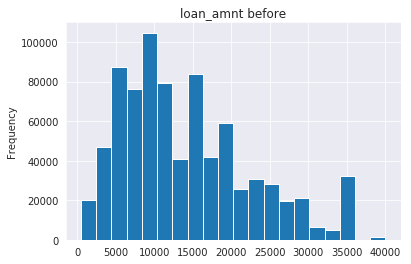

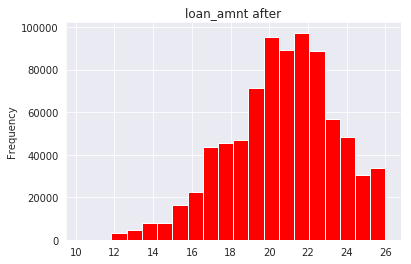

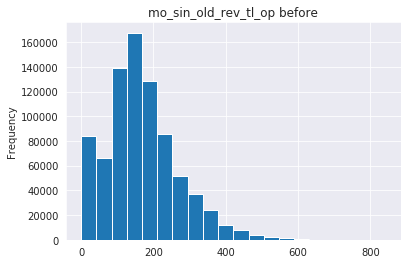

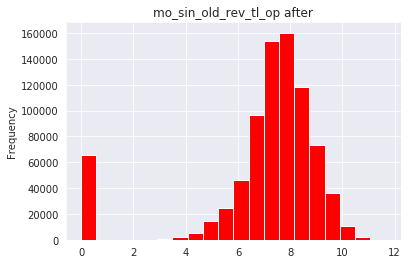

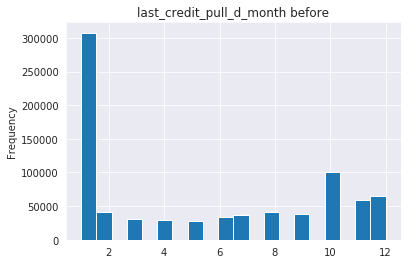

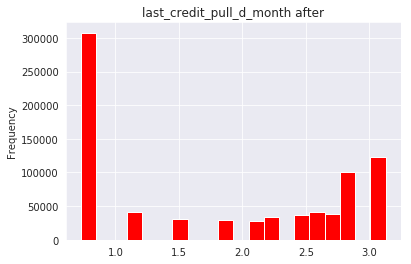

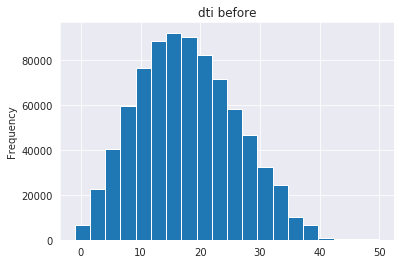

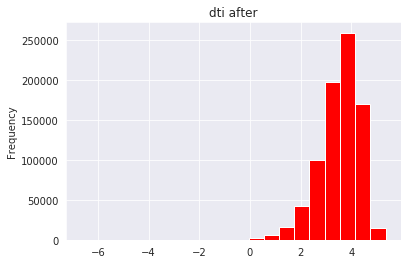

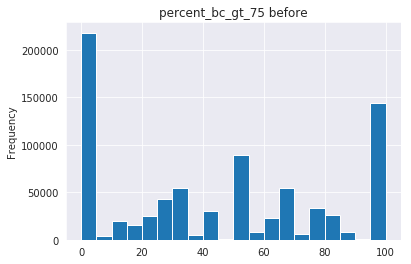

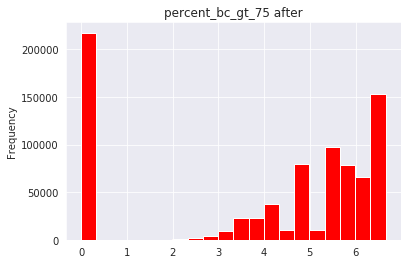

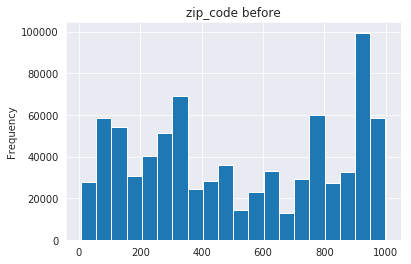

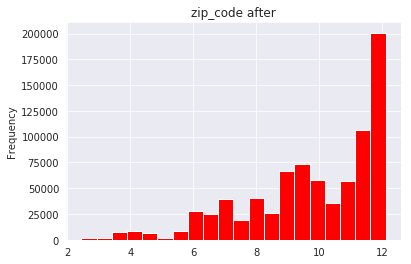

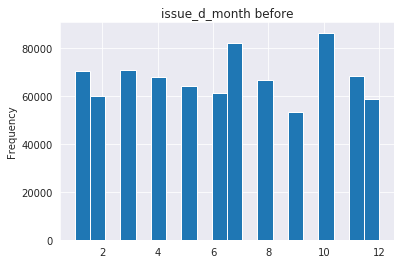

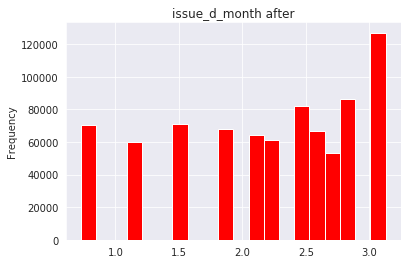

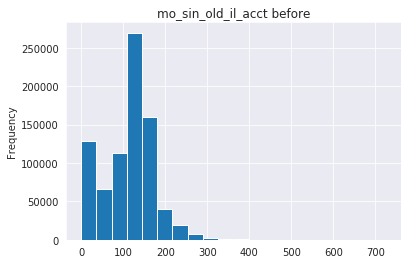

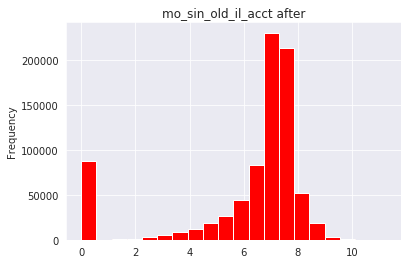

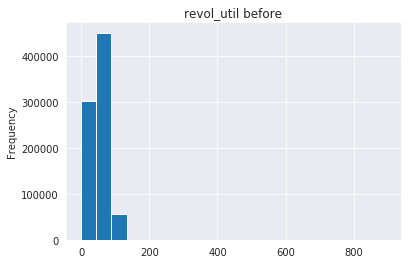

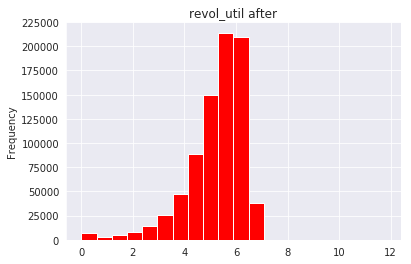

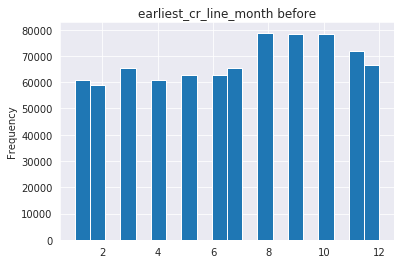

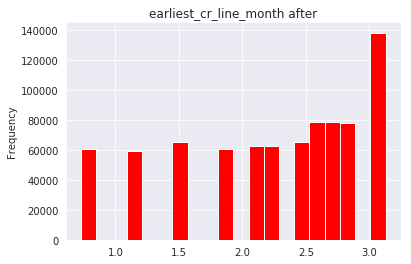

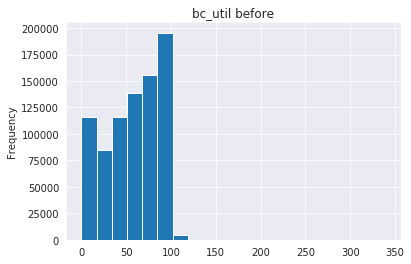

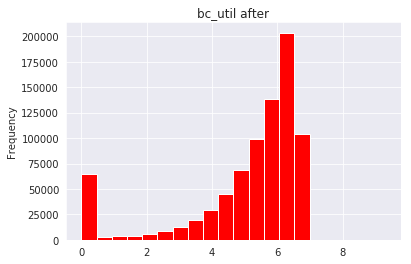

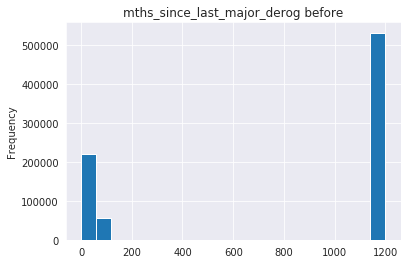

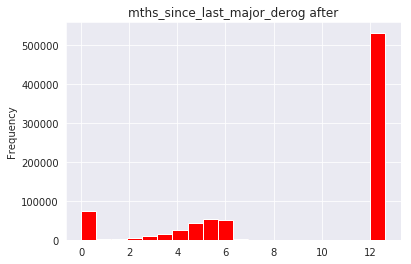

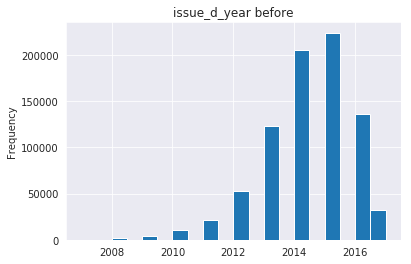

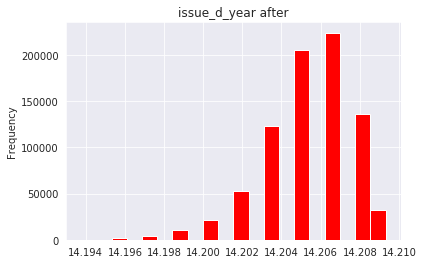

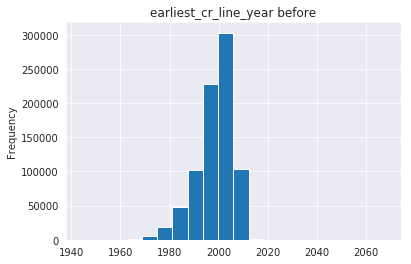

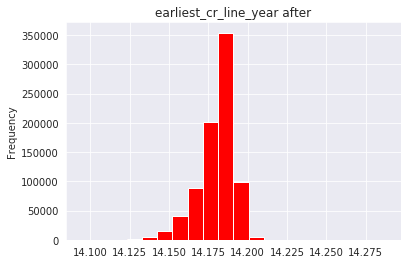

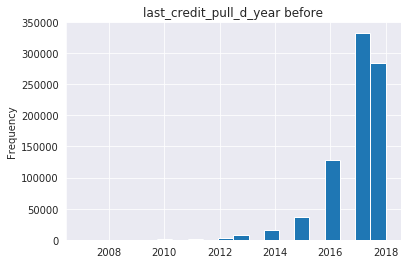

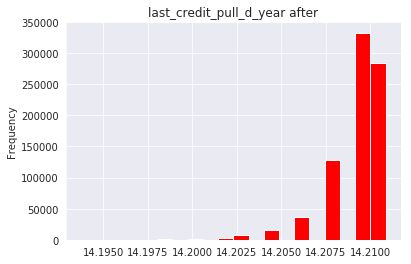

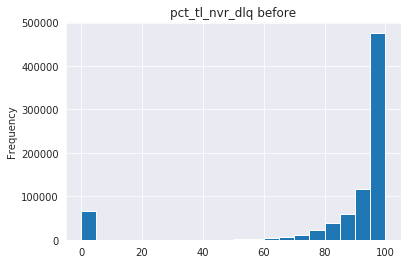

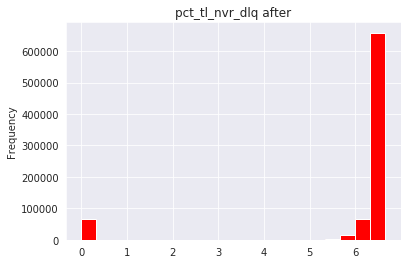

In [14]:
from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    plt.figure()
    df[feat].plot.hist(bins=20, title=feat+' before')
    # plt.show()
    df[feat] = boxcox1p(df[feat], lam)
    plt.figure()
    df[feat].plot.hist(bins=20, title=feat+' after', color='red')
    plt.show()

In [15]:
cat_features = df.select_dtypes(include=['object']).columns
print(cat_features)

for y in cat_features:
    # print(y + " has " + str(len(df[y].unique())) + " unique values")
    df = df.join(pd.get_dummies(df[y], prefix=y))
    df.drop(y, axis=1, inplace=True)
    
df.rename(columns = {'emp_length_<1':'emp_length_less_than_1'}, inplace = True)

Index(['grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'purpose', 'addr_state', 'initial_list_status'],
      dtype='object')


In [16]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df, 50))
# print("Redundant Pairs")
# print(get_redundant_pairs(df))

Top Absolute Correlations
initial_list_status_f    initial_list_status_w    1.000000
loan_amnt                funded_amnt              0.999487
num_actv_rev_tl          num_rev_tl_bal_gt_0      0.994185
funded_amnt              funded_amnt_inv          0.991957
loan_amnt                funded_amnt_inv          0.990966
tot_cur_bal              tot_hi_cred_lim          0.987256
funded_amnt              installment              0.974752
loan_amnt                installment              0.973912
tot_cur_bal              avg_cur_bal              0.971641
funded_amnt_inv          installment              0.966746
total_bal_il             il_util                  0.956282
max_bal_bc               all_util                 0.955055
avg_cur_bal              tot_hi_cred_lim          0.953576
total_bal_il             all_util                 0.929207
il_util                  all_util                 0.924799
open_act_il              total_bal_il             0.924633
num_bc_tl                num_r

In [17]:
# df = pd.get_dummies(df)

In [18]:
features = df

from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold, cross_val_score

# Split the features and loan_status data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, loan_status, test_size = 0.2, random_state = 0)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    print(learner)
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner.fit(X_train, y_train)
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set,
    #       then get predictions
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    end = time() # Get end time
       
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy
    results['acc_train'] = accuracy_score(y_train, learner.predict(X_train))
        
    # TODO: Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test, learner.predict(X_test))
    
    # TODO: Compute F-score
    results['f_train'] = fbeta_score(y_train, learner.predict(X_train), beta=0.5)
        
    # TODO: Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test, learner.predict(X_test), beta=0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Training set has 648460 samples.
Testing set has 162116 samples.


In [19]:
from sklearn import decomposition

In [20]:
# Apply PCA by fitting the data with the same number of dimensions as features

# from vpython import *

pca = decomposition.PCA(n_components=10)
pca.fit(features)
df_pca = pca.transform(features)

In [21]:
print(pca.explained_variance_ratio_)
print(np.cumsum(pca.explained_variance_ratio_))
print(pca.singular_values_)

[0.50465254 0.16262521 0.08369109 0.05668061 0.0327462  0.02563506
 0.01905822 0.01599664 0.01437809 0.01119224]
[0.50465254 0.66727775 0.75096884 0.80764944 0.84039564 0.8660307
 0.88508892 0.90108556 0.91546365 0.92665589]
[19137.6822328  10863.93214154  7793.50300015  6413.7252578
  4874.98779264  4313.30639277  3719.06903821  3407.27730054
  3230.30634919  2850.04397591]


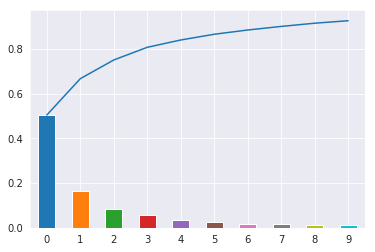

In [22]:
pd.Series(pca.explained_variance_ratio_).plot.bar()
pd.Series(np.cumsum(pca.explained_variance_ratio_)).plot()

In [23]:
# df_pca

In [24]:
print(df_pca.shape)
print(df.shape)
# features = features[0:95]
# loan_status = loan_status[0:95]
print(features.shape)
print(loan_status.shape)

(810576, 10)
(810576, 207)
(810576, 207)
(810576,)


In [25]:
from imblearn import over_sampling as os
from imblearn import pipeline as pl
from imblearn.metrics import classification_report_imbalanced
from sklearn.svm import LinearSVC
RANDOM_STATE=42

pipeline = pl.make_pipeline(os.SMOTE(random_state=RANDOM_STATE),
            LinearSVC(random_state=RANDOM_STATE))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, loan_status, random_state=RANDOM_STATE)

# Train the classifier with balancing
pipeline.fit(X_train, y_train)

# Test the classifier and get the prediction
y_pred_bal = pipeline.predict(X_test)

# Show the classification report
print(classification_report_imbalanced(y_test, y_pred_bal))
print(fbeta_score(y_test, y_pred_bal, beta=0.5))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.23      0.92      0.22      0.37      0.45      0.22     41560
          1       0.92      0.22      0.92      0.36      0.45      0.19    161084

avg / total       0.78      0.37      0.78      0.36      0.45      0.20    202644

0.5643195453110199


In [26]:

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier


/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [27]:
names = ["XGBoost", "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [XGBClassifier(), DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

print("Original data")
print("=============")
print(features.shape)
for name, clf in zip(names, classifiers):
    print(name)
    X_train, X_test, y_train, y_test = train_test_split(features, loan_status, test_size = 0.2, random_state = 0)
    result = train_predict(clf, len(y_train), X_train, y_train, X_test, y_test)
    print(result)
    print('-----------------------------------')
    
print("PCA data")
print("=============")
for pca_comp in [1]: #, 5, 10, 25, 50, 100, 150]:
    print("PCA component size: " + str(pca_comp))
    pca = decomposition.PCA(n_components=pca_comp)
    pca.fit(features)
    features_pca = pca.transform(features)
    for name, clf in zip(names, classifiers):
        X_train, X_test, y_train, y_test = train_test_split(features_pca, loan_status, test_size = 0.2, random_state = 0)
        result = train_predict(clf, len(y_train), X_train, y_train, X_test, y_test)
        print(result)
        print('-----------------------------------')

Original data
(810576, 207)
XGBoost
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

XGBClassifier trained on 648460 samples.
{'train_time': 288.38458609580994, 'pred_time': 5.03834342956543, 'acc_train': 0.8365311661474879, 'acc_test': 0.8362222112561376, 'f_train': 0.8673481017510873, 'f_test': 0.8671002560022142}
-----------------------------------
Decision Tree
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
DecisionTreeClassifier trained on 648460 samples.
{'train_time': 12.39626145362854, 'pred_time': 0.789985179901123, 'acc_train': 0.8058122320574901, 'acc_test': 0.8045288558809741, 'f_train': 0.8406346234631402, 'f_test': 0.8397289342549005}
-----------------------------------
Random Forest
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
  

/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis trained on 648460 samples.
{'train_time': 19.452104806900024, 'pred_time': 7.2084126472473145, 'acc_train': 0.2915522931252506, 'acc_test': 0.2924079054504182, 'f_train': 0.3888086211063268, 'f_test': 0.3884725474889409}
-----------------------------------
PCA data
PCA component size: 1
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

XGBClassifier trained on 648460 samples.
{'train_time': 15.084110021591187, 'pred_time': 2.0834662914276123, 'acc_train': 0.7950868210837986, 'acc_test': 0.7939376742579387, 'f_train': 0.8290640511323327, 'f_test': 0.828064243013791}
-----------------------------------
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
DecisionTreeClassifier trained on 648460 samples.
{'train_time': 0.6693077087402344, 'pred_time': 0.0352475643157959, 'acc_train': 0.795100700120285, 'acc_test': 0.79388215845444, 'f_train': 0.8290778504124049, 'f_test': 0.828044697338182}
-----------------------------------
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_fe

In [28]:
print("Scaling")
print("=============")
features =  StandardScaler().fit_transform(features)
for name, clf in zip(names, classifiers):
    print(name)
    X_train, X_test, y_train, y_test = train_test_split(features, loan_status, test_size = 0.2, random_state = 0)
    result = train_predict(clf, len(y_train), X_train, y_train, X_test, y_test)
    print(result)

Scaling
XGBoost
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

XGBClassifier trained on 648460 samples.
{'train_time': 309.0161578655243, 'pred_time': 3.564168930053711, 'acc_train': 0.8365311661474879, 'acc_test': 0.8362222112561376, 'f_train': 0.8673481017510873, 'f_test': 0.8671002560022142}
Decision Tree
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
DecisionTreeClassifier trained on 648460 samples.
{'train_time': 16.392412662506104, 'pred_time': 0.43315935134887695, 'acc_train': 0.8058122320574901, 'acc_test': 0.8045288558809741, 'f_train': 0.8406346234631402, 'f_test': 0.8397289342549005}
Random Forest
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=1, max_leaf_nodes=None,
         

/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis trained on 648460 samples.
{'train_time': 18.825056791305542, 'pred_time': 6.745596647262573, 'acc_train': 0.6811260524936003, 'acc_test': 0.6787362135754644, 'f_train': 0.8085426159573054, 'f_test': 0.8067457370984467}


In [29]:
print("PCA component size: " + str(1))
pca = decomposition.PCA(n_components=1)
pca.fit(features)
features_pca = pca.transform(features)

print("More fine tuning")
    
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

# TODO: Initialize the classifier
clf = XGBClassifier()

## Note the features is already scaled
X_train, X_test, y_train, y_test = train_test_split(features_pca, loan_status, test_size = 0.2, random_state = 0)

# TODO: Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score, beta=0.5)

PCA component size: 1
More fine tuning


In [ ]:
# TODO: Create the parameters list you wish to tune
parameters1 = {
    'min_child_weight': range(1, 6, 2),
    'max_depth': range(3, 10, 2),
    #--- 'gamma': [i/10.0 for i in range(0,5)],
    #--- 'subsample':[i/10.0 for i in range(6,10)],
    #--- 'colsample_bytree':[i/10.0 for i in range(6,10)],
    #--- 'alpha': [1e-5, 1e-2, 0.1, 1, 100],
    #'scale_pos_weight': [],
    #'eval_metric': [ 'rmse', 'mae', 'logloss', 'error', 'merror', 'mlogloss', 'auc' ],
    #'booster': ['gbtree', 'gblinear'],
    #'eta': [],
    #'max_leaf_nodes': [],
    #'max_delta_step': [],
    #'colsample_bylevel': [],
    #'lambda': [],
}

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf, parameters1, scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters1
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print(grid_fit.best_params_)

/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/anilraj/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

In [ ]:
# TODO: Create the parameters list you wish to tune
parameters2 = {
    #--- 'min_child_weight': range(1, 6, 2),
    #--- 'max_depth': range(3, 10, 2),
    'gamma': [i/10.0 for i in range(0,5)],
    'subsample':[i/10.0 for i in range(6,10)],
    #--- 'colsample_bytree':[i/10.0 for i in range(6,10)],
    #--- 'alpha': [1e-5, 1e-2, 0.1, 1, 100],
    #'scale_pos_weight': [],
    #'eval_metric': [ 'rmse', 'mae', 'logloss', 'error', 'merror', 'mlogloss', 'auc' ],
    #'booster': ['gbtree', 'gblinear'],
    #'eta': [],
    #'max_leaf_nodes': [],
    #'max_delta_step': [],
    #'colsample_bylevel': [],
    #'lambda': [],
}

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf, parameters2, scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters2
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print(grid_fit.best_params_)

In [ ]:
# TODO: Create the parameters list you wish to tune
parameters3 = {
    #-- 'min_child_weight': range(1, 6, 2),
    #-- 'max_depth': range(3, 10, 2),
    #-- 'gamma': [i/10.0 for i in range(0,5)],
    #-- 'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)],
    'alpha': [1e-5, 1e-2, 0.1, 1, 100],
    #'scale_pos_weight': [],
    #'eval_metric': [ 'rmse', 'mae', 'logloss', 'error', 'merror', 'mlogloss', 'auc' ],
    #'booster': ['gbtree', 'gblinear'],
    #'eta': [],
    #'max_leaf_nodes': [],
    #'max_delta_step': [],
    #'colsample_bylevel': [],
    #'lambda': [],
}

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf, parameters3, scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters3
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print(grid_fit.best_params_)